# Práctica 1: Creación del Índice de Marginalidad

In [1]:
import math
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from datetime import datetime
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

## Carga de datos

In [2]:
ruta1= os.path.join('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/iter_00_cpv2020/conjunto_de_datos')
lst_ = os.listdir(ruta1)
lst_

['conjunto_de_datos_iter_00CSV20.csv']

In [4]:
df_i = pd.read_csv(os.path.join(ruta1, "conjunto_de_datos_iter_00CSV20.csv"))
df_i.head()

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_6290/3084221981.py:1: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


In [5]:
keep = ['NOM_ENT', 'NOM_MUN','POBTOT','PNACENT','PNACOE','PRESOE15','P3HLINHE','PCON_DISC','PCON_LIMI','PCLIM_PMEN','P3A5_NOA','P6A11_NOA',
        'P12A14NOA','P8A14AN','P15YM_AN','P15YM_SE','P15PRI_IN','P15SEC_IN','GRAPROES','PE_INAC','PDESOCUP','PSINDER','OCUPVIVPAR','VPH_PISOTI',
        'VPH_1DOR','VPH_1CUART','VPH_S_ELEC','VPH_AGUAFV','VPH_LETR','VPH_NODREN','VPH_NDEAED','VPH_NDACMM','VPH_SNBIEN','VPH_BICI','VPH_SINRTV',
        'VPH_SINLTC','VPH_SINCINT','VPH_SINTIC']

In [6]:
df_i2 = df_i[keep]

## EDA

In [7]:
df_i2.shape

(195662, 38)

In [8]:
df_i2.head()

,NOM_ENT,NOM_MUN,POBTOT,PNACENT,PNACOE,PRESOE15,P3HLINHE,PCON_DISC,PCON_LIMI,PCLIM_PMEN,...,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_BICI,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,Total nacional,Total nacional,126014024,102724322,21611963,3807844,865972,6179890,13934448,1590583,...,1396774,1498766,79584,16874580,581095,7469168,1788552,3170894,15108204,852871
1,Total nacional,Total nacional,250354,177757,54046,16172,2712,12126,28067,2823,...,9825,14708,4842,24373,5136,13600,12775,14143,51293,7154
2,Total nacional,Total nacional,147125,117805,20274,6214,3098,8058,16685,1579,...,6050,10155,2935,16122,4115,6330,8247,10065,29741,5283
3,Aguascalientes,Total de la entidad Aguascalientes,1425607,1133247,276430,56422,25,71294,165482,20169,...,1011,2379,184,130744,876,105752,6021,15323,128996,1711
4,Aguascalientes,Total de la entidad Aguascalientes,3697,2908,749,152,0,212,418,56,...,27,82,16,203,12,407,39,62,530,20


In [9]:
df_i2.tail()

,NOM_ENT,NOM_MUN,POBTOT,PNACENT,PNACOE,PRESOE15,P3HLINHE,PCON_DISC,PCON_LIMI,PCLIM_PMEN,...,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_BICI,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
195657,Zacatecas,Santa María de la Paz,165,161,3,0,0,7,17,4,...,15,10,0,15,0,12,3,9,38,1
195658,Zacatecas,Santa María de la Paz,1,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
195659,Zacatecas,Santa María de la Paz,97,85,8,3,0,3,21,1,...,3,4,0,11,0,5,1,10,19,0
195660,Zacatecas,Santa María de la Paz,3,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
195661,Zacatecas,Santa María de la Paz,32,26,3,2,0,1,5,1,...,0,1,0,2,1,2,1,2,7,1


In [10]:
df_i2.isnull().sum()

NOM_ENT        0
NOM_MUN        0
POBTOT         0
PNACENT        0
PNACOE         0
PRESOE15       0
P3HLINHE       0
PCON_DISC      0
PCON_LIMI      0
PCLIM_PMEN     0
P3A5_NOA       0
P6A11_NOA      0
P12A14NOA      0
P8A14AN        0
P15YM_AN       0
P15YM_SE       0
P15PRI_IN      0
P15SEC_IN      0
GRAPROES       0
PE_INAC        0
PDESOCUP       0
PSINDER        0
OCUPVIVPAR     0
VPH_PISOTI     0
VPH_1DOR       0
VPH_1CUART     0
VPH_S_ELEC     0
VPH_AGUAFV     0
VPH_LETR       0
VPH_NODREN     0
VPH_NDEAED     0
VPH_NDACMM     0
VPH_SNBIEN     0
VPH_BICI       0
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
dtype: int64

In [11]:
df_i2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195662 entries, 0 to 195661
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NOM_ENT      195662 non-null  object
 1   NOM_MUN      195662 non-null  object
 2   POBTOT       195662 non-null  int64 
 3   PNACENT      195662 non-null  object
 4   PNACOE       195662 non-null  object
 5   PRESOE15     195662 non-null  object
 6   P3HLINHE     195662 non-null  object
 7   PCON_DISC    195662 non-null  object
 8   PCON_LIMI    195662 non-null  object
 9   PCLIM_PMEN   195662 non-null  object
 10  P3A5_NOA     195662 non-null  object
 11  P6A11_NOA    195662 non-null  object
 12  P12A14NOA    195662 non-null  object
 13  P8A14AN      195662 non-null  object
 14  P15YM_AN     195662 non-null  object
 15  P15YM_SE     195662 non-null  object
 16  P15PRI_IN    195662 non-null  object
 17  P15SEC_IN    195662 non-null  object
 18  GRAPROES     195662 non-null  object
 19  PE

In [12]:
df_i2 = df_i2[~df_i2['NOM_MUN'].fillna('').str.startswith('Total')]
df_i2.head()

,NOM_ENT,NOM_MUN,POBTOT,PNACENT,PNACOE,PRESOE15,P3HLINHE,PCON_DISC,PCON_LIMI,PCLIM_PMEN,...,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_BICI,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
6,Aguascalientes,Aguascalientes,948990,723960,214908,42481,8,47525,116705,13945,...,520,798,53,88348,380,54393,3299,7293,74227,731
7,Aguascalientes,Aguascalientes,863893,652371,202249,39743,6,43833,108760,12893,...,60,111,19,82142,313,47846,2995,5984,63661,595
8,Aguascalientes,Aguascalientes,5,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
9,Aguascalientes,Aguascalientes,41,38,3,0,0,0,1,1,...,1,10,0,7,0,5,0,1,6,0
10,Aguascalientes,Aguascalientes,8,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [13]:
columnas_excluir = ['NOM_ENT', 'NOM_MUN']

for col in df_i2.columns:
    if col not in columnas_excluir:
    
        df_i2[col] = pd.to_numeric(df_i2[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')
        
        if df_i2[col].isnull().sum() == 0:
            df_i2[col] = df_i2[col].astype('int64')


In [14]:
df_i2.dtypes

NOM_ENT         object
NOM_MUN         object
POBTOT           int64
PNACENT        float64
PNACOE         float64
PRESOE15       float64
P3HLINHE       float64
PCON_DISC      float64
PCON_LIMI      float64
PCLIM_PMEN     float64
P3A5_NOA       float64
P6A11_NOA      float64
P12A14NOA      float64
P8A14AN        float64
P15YM_AN       float64
P15YM_SE       float64
P15PRI_IN      float64
P15SEC_IN      float64
GRAPROES       float64
PE_INAC        float64
PDESOCUP       float64
PSINDER        float64
OCUPVIVPAR     float64
VPH_PISOTI     float64
VPH_1DOR       float64
VPH_1CUART     float64
VPH_S_ELEC     float64
VPH_AGUAFV     float64
VPH_LETR       float64
VPH_NODREN     float64
VPH_NDEAED     float64
VPH_NDACMM     float64
VPH_SNBIEN     float64
VPH_BICI       float64
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
dtype: object

In [15]:
df_i2.shape

(195563, 38)

In [16]:
df = df_i2.groupby(['NOM_ENT','NOM_MUN']).sum(numeric_only=True)

In [17]:
df.describe()

,POBTOT,PNACENT,PNACOE,PRESOE15,P3HLINHE,PCON_DISC,PCON_LIMI,PCLIM_PMEN,P3A5_NOA,P6A11_NOA,...,VPH_LETR,VPH_NODREN,VPH_NDEAED,VPH_NDACMM,VPH_SNBIEN,VPH_BICI,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
count,2.467000e+03,2.467000e+03,2.467000e+03,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,...,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,1.023208e+05,8.327679e+04,1.752021e+04,3086.884070,701.978922,5009.882448,11296.358735,1289.457236,1912.972436,467.781921,...,1132.220105,1214.845967,64.458452,13679.892582,470.991893,6055.152006,1449.808269,2570.439805,12247.747467,691.297933
std,2.942335e+05,2.249473e+05,8.002108e+04,12434.597293,3984.850656,13591.323105,32026.665003,4016.152241,5478.452682,1352.974021,...,2571.292258,2283.888544,201.305960,37299.376243,1058.333995,17815.521521,2588.978407,4111.766928,24837.324158,1290.720935
min,1.630000e+02,1.490000e+02,0.000000e+00,0.000000,0.000000,11.000000,54.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,2.000000,9.000000,49.000000,0.000000
25%,9.035000e+03,8.216500e+03,2.835000e+02,126.500000,0.000000,570.000000,1136.000000,85.000000,138.000000,32.000000,...,69.500000,152.000000,5.000000,1419.500000,60.000000,188.000000,229.000000,464.500000,1757.000000,108.000000
50%,2.714000e+04,2.417400e+04,1.502000e+03,418.000000,6.000000,1578.000000,3158.000000,294.000000,500.000000,114.000000,...,282.000000,460.000000,18.000000,3954.000000,184.000000,1188.000000,596.000000,1182.000000,5050.000000,296.000000
75%,7.068750e+04,6.241800e+04,5.756000e+03,1254.000000,116.000000,3827.000000,7964.500000,834.000000,1421.000000,349.000000,...,1021.500000,1324.000000,58.000000,10169.000000,495.500000,4705.000000,1590.000000,2994.000000,12198.000000,770.000000
max,3.846134e+06,3.063154e+06,1.704140e+06,259736.000000,92149.000000,208848.000000,467512.000000,58562.000000,98858.000000,26562.000000,...,34608.000000,29408.000000,5228.000000,581790.000000,27370.000000,270200.000000,37586.000000,51296.000000,305294.000000,31304.000000


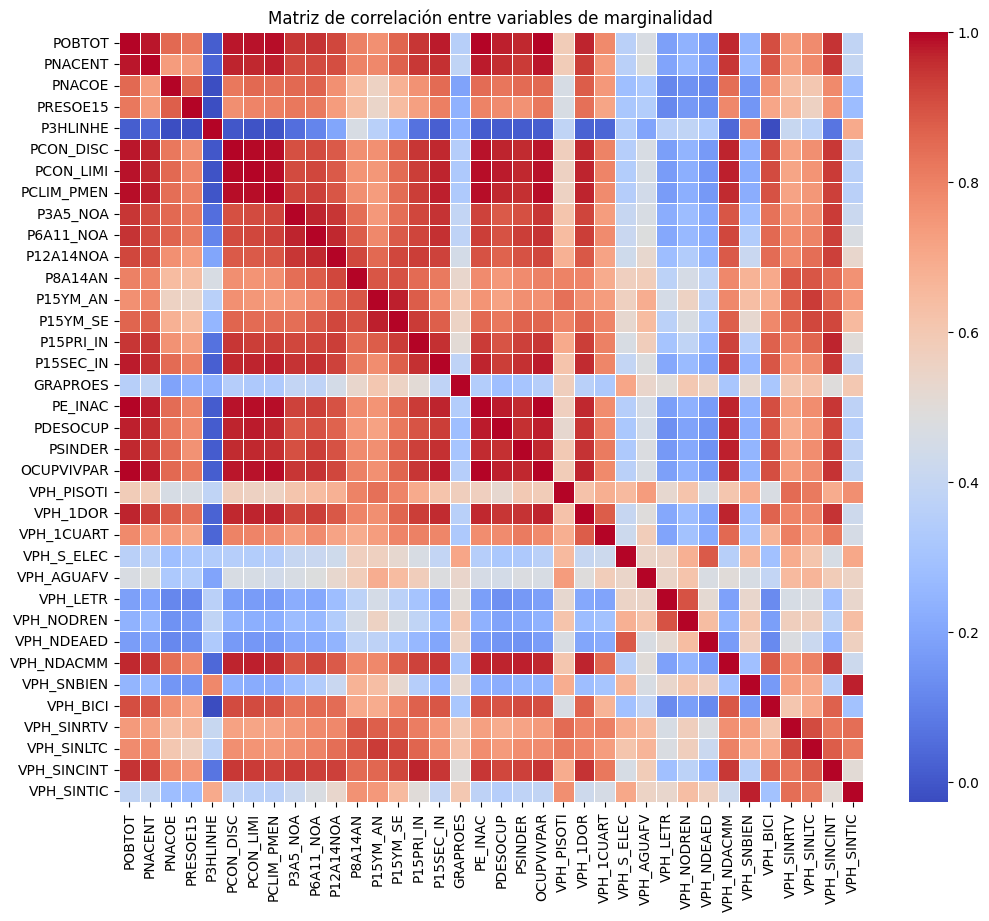

In [18]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr,cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Matriz de correlación entre variables de marginalidad")
plt.show()

In [ ]:
# Correlaciones
#styled_corr = df.corr().style.applymap(lambda x: 'color: red' if ((abs(x) > 0.4) & (abs(x) < 1)) 
#                                 else ('color: transparent' if x == 1 else 'color: white'))
#styled_corr

IndentationError: unexpected indent (3998420146.py, line 3)

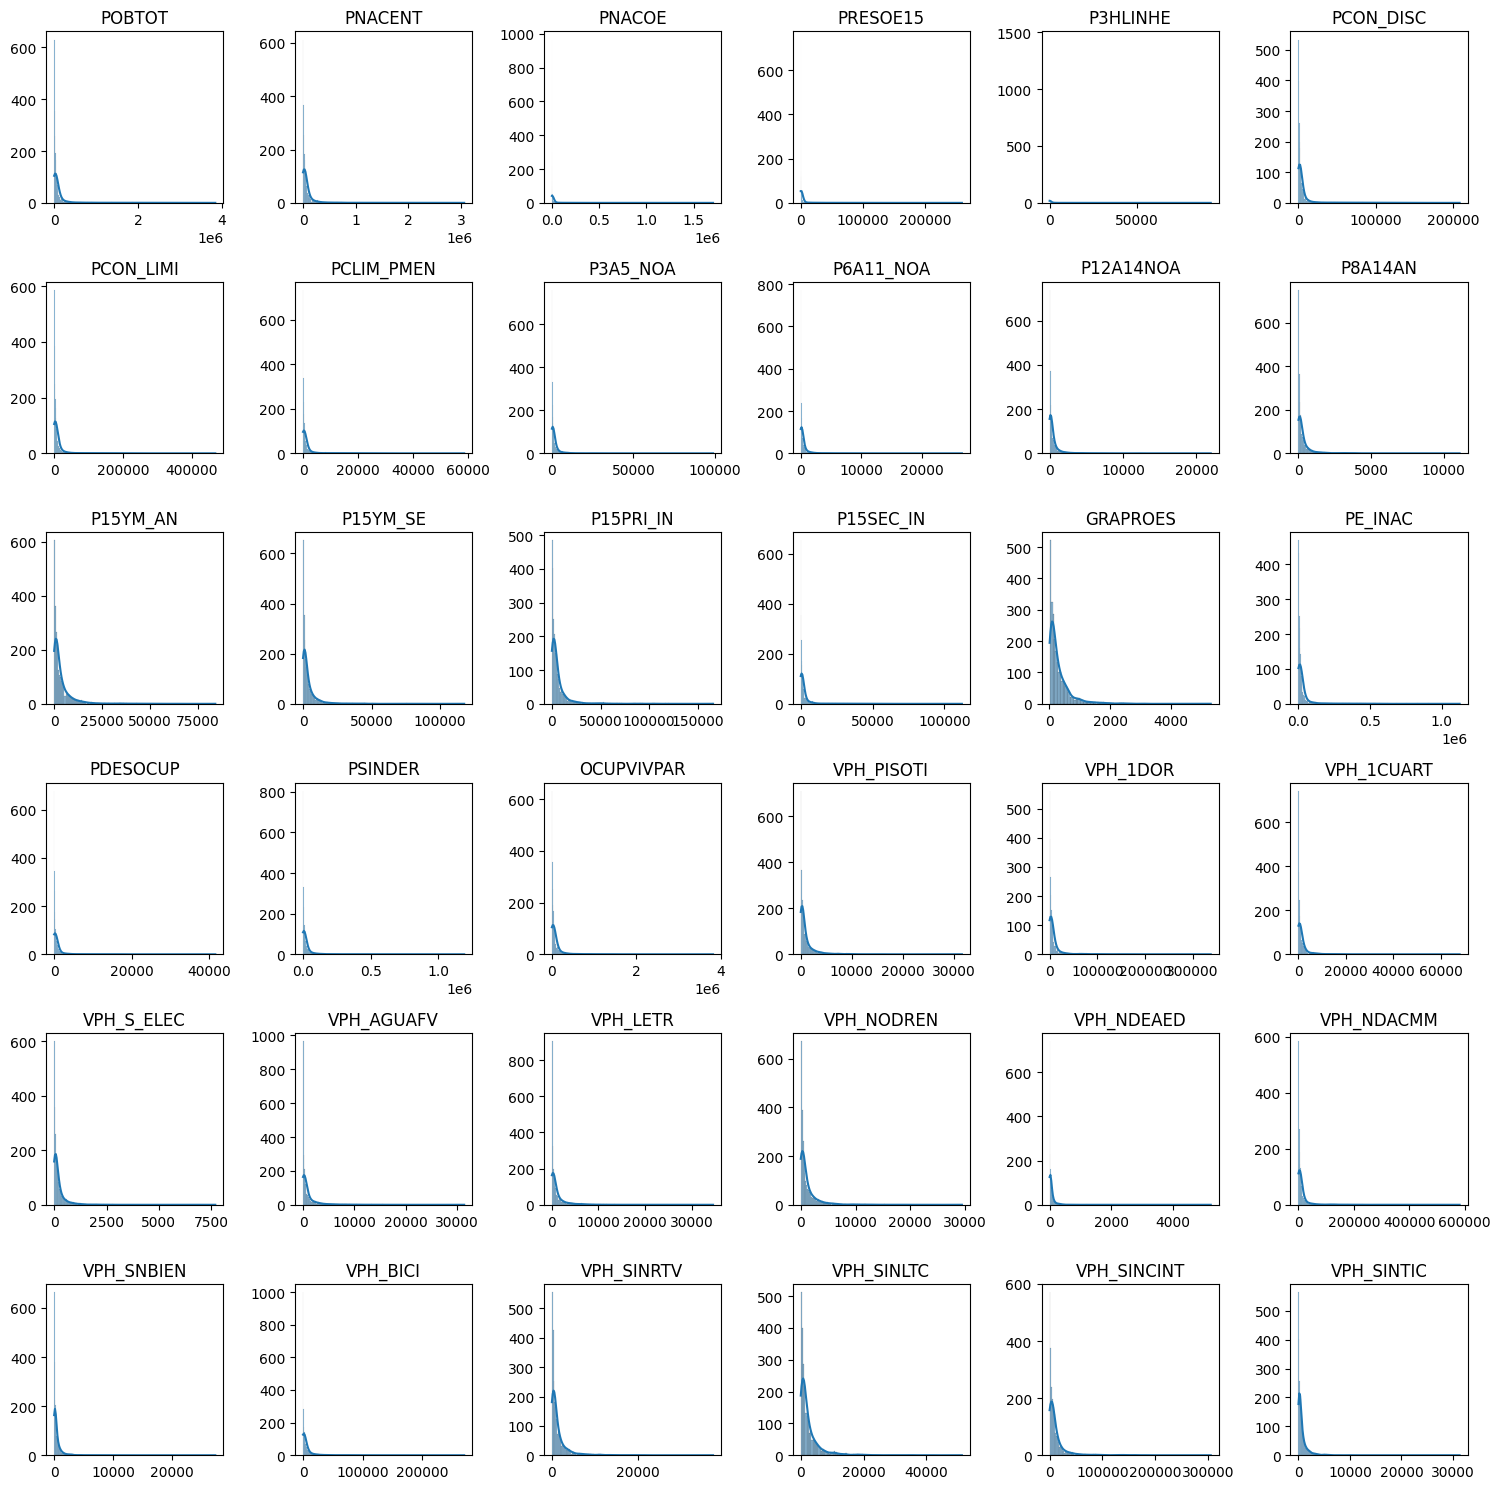

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(15, 15))  # filas, columnas
axes = axes.flatten()  # Para poder iterar fácilmente

# Iteramos sobre las variables y ejes
for i, var in enumerate(df.columns):
    if i >= 37:  # Por si hay más de 8 variables, ignora el resto
        break
    ax = axes[i]
    sns.histplot(data=df, x=var, kde=True, ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

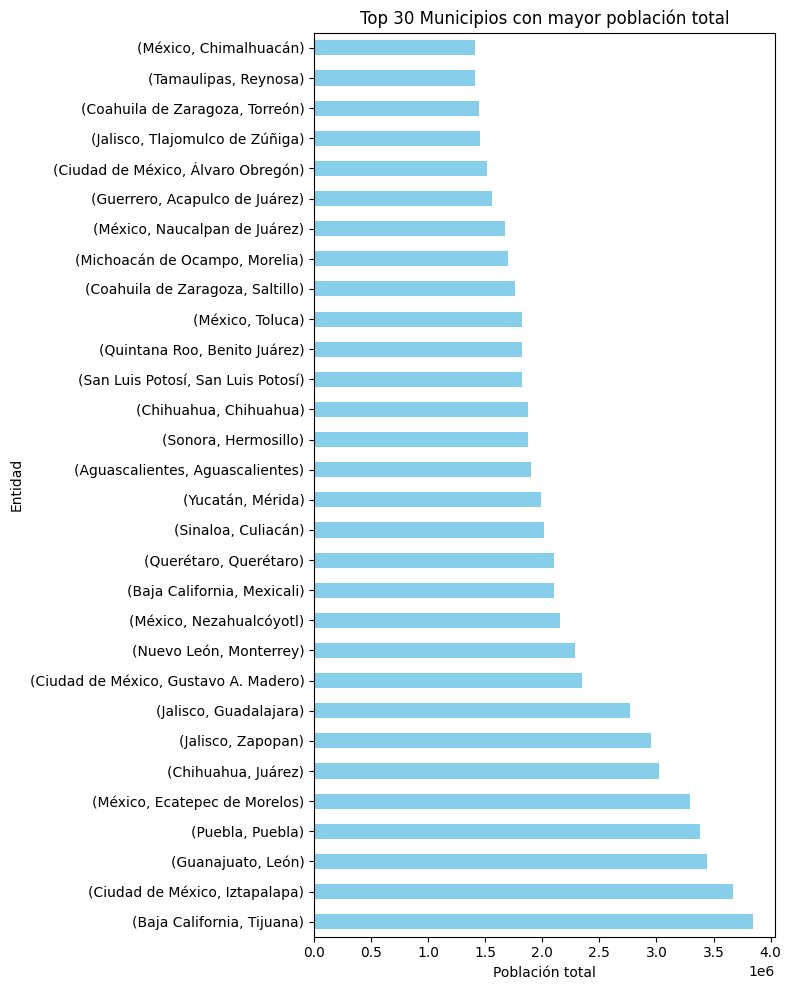

In [27]:
top30 = df_i2.groupby(['NOM_ENT','NOM_MUN'])['POBTOT'].sum().sort_values(ascending=False).head(30)

top30.plot(
    kind='barh', figsize=(8, 10), color='skyblue'
)
plt.title('Top 30 Municipios con mayor población total')
plt.xlabel('Población total')
plt.ylabel('Entidad')
plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['POBTOT', 'PNACENT', 'PNACOE', 'PRESOE15', 'P3HLINHE', 'PCON_DISC',
       'PCON_LIMI', 'PCLIM_PMEN', 'P3A5_NOA', 'P6A11_NOA', 'P12A14NOA',
       'P8A14AN', 'P15YM_AN', 'P15YM_SE', 'P15PRI_IN', 'P15SEC_IN', 'GRAPROES',
       'PE_INAC', 'PDESOCUP', 'PSINDER', 'OCUPVIVPAR', 'VPH_PISOTI',
       'VPH_1DOR', 'VPH_1CUART', 'VPH_S_ELEC', 'VPH_AGUAFV', 'VPH_LETR',
       'VPH_NODREN', 'VPH_NDEAED', 'VPH_NDACMM', 'VPH_SNBIEN', 'VPH_BICI',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC'],
      dtype='object')

Top 10 variables con mayor varianza: ['POBTOT', 'OCUPVIVPAR', 'PNACENT', 'PE_INAC', 'PNACOE', 'PSINDER', 'VPH_NDACMM', 'PCON_LIMI', 'VPH_SINCINT', 'VPH_1DOR']


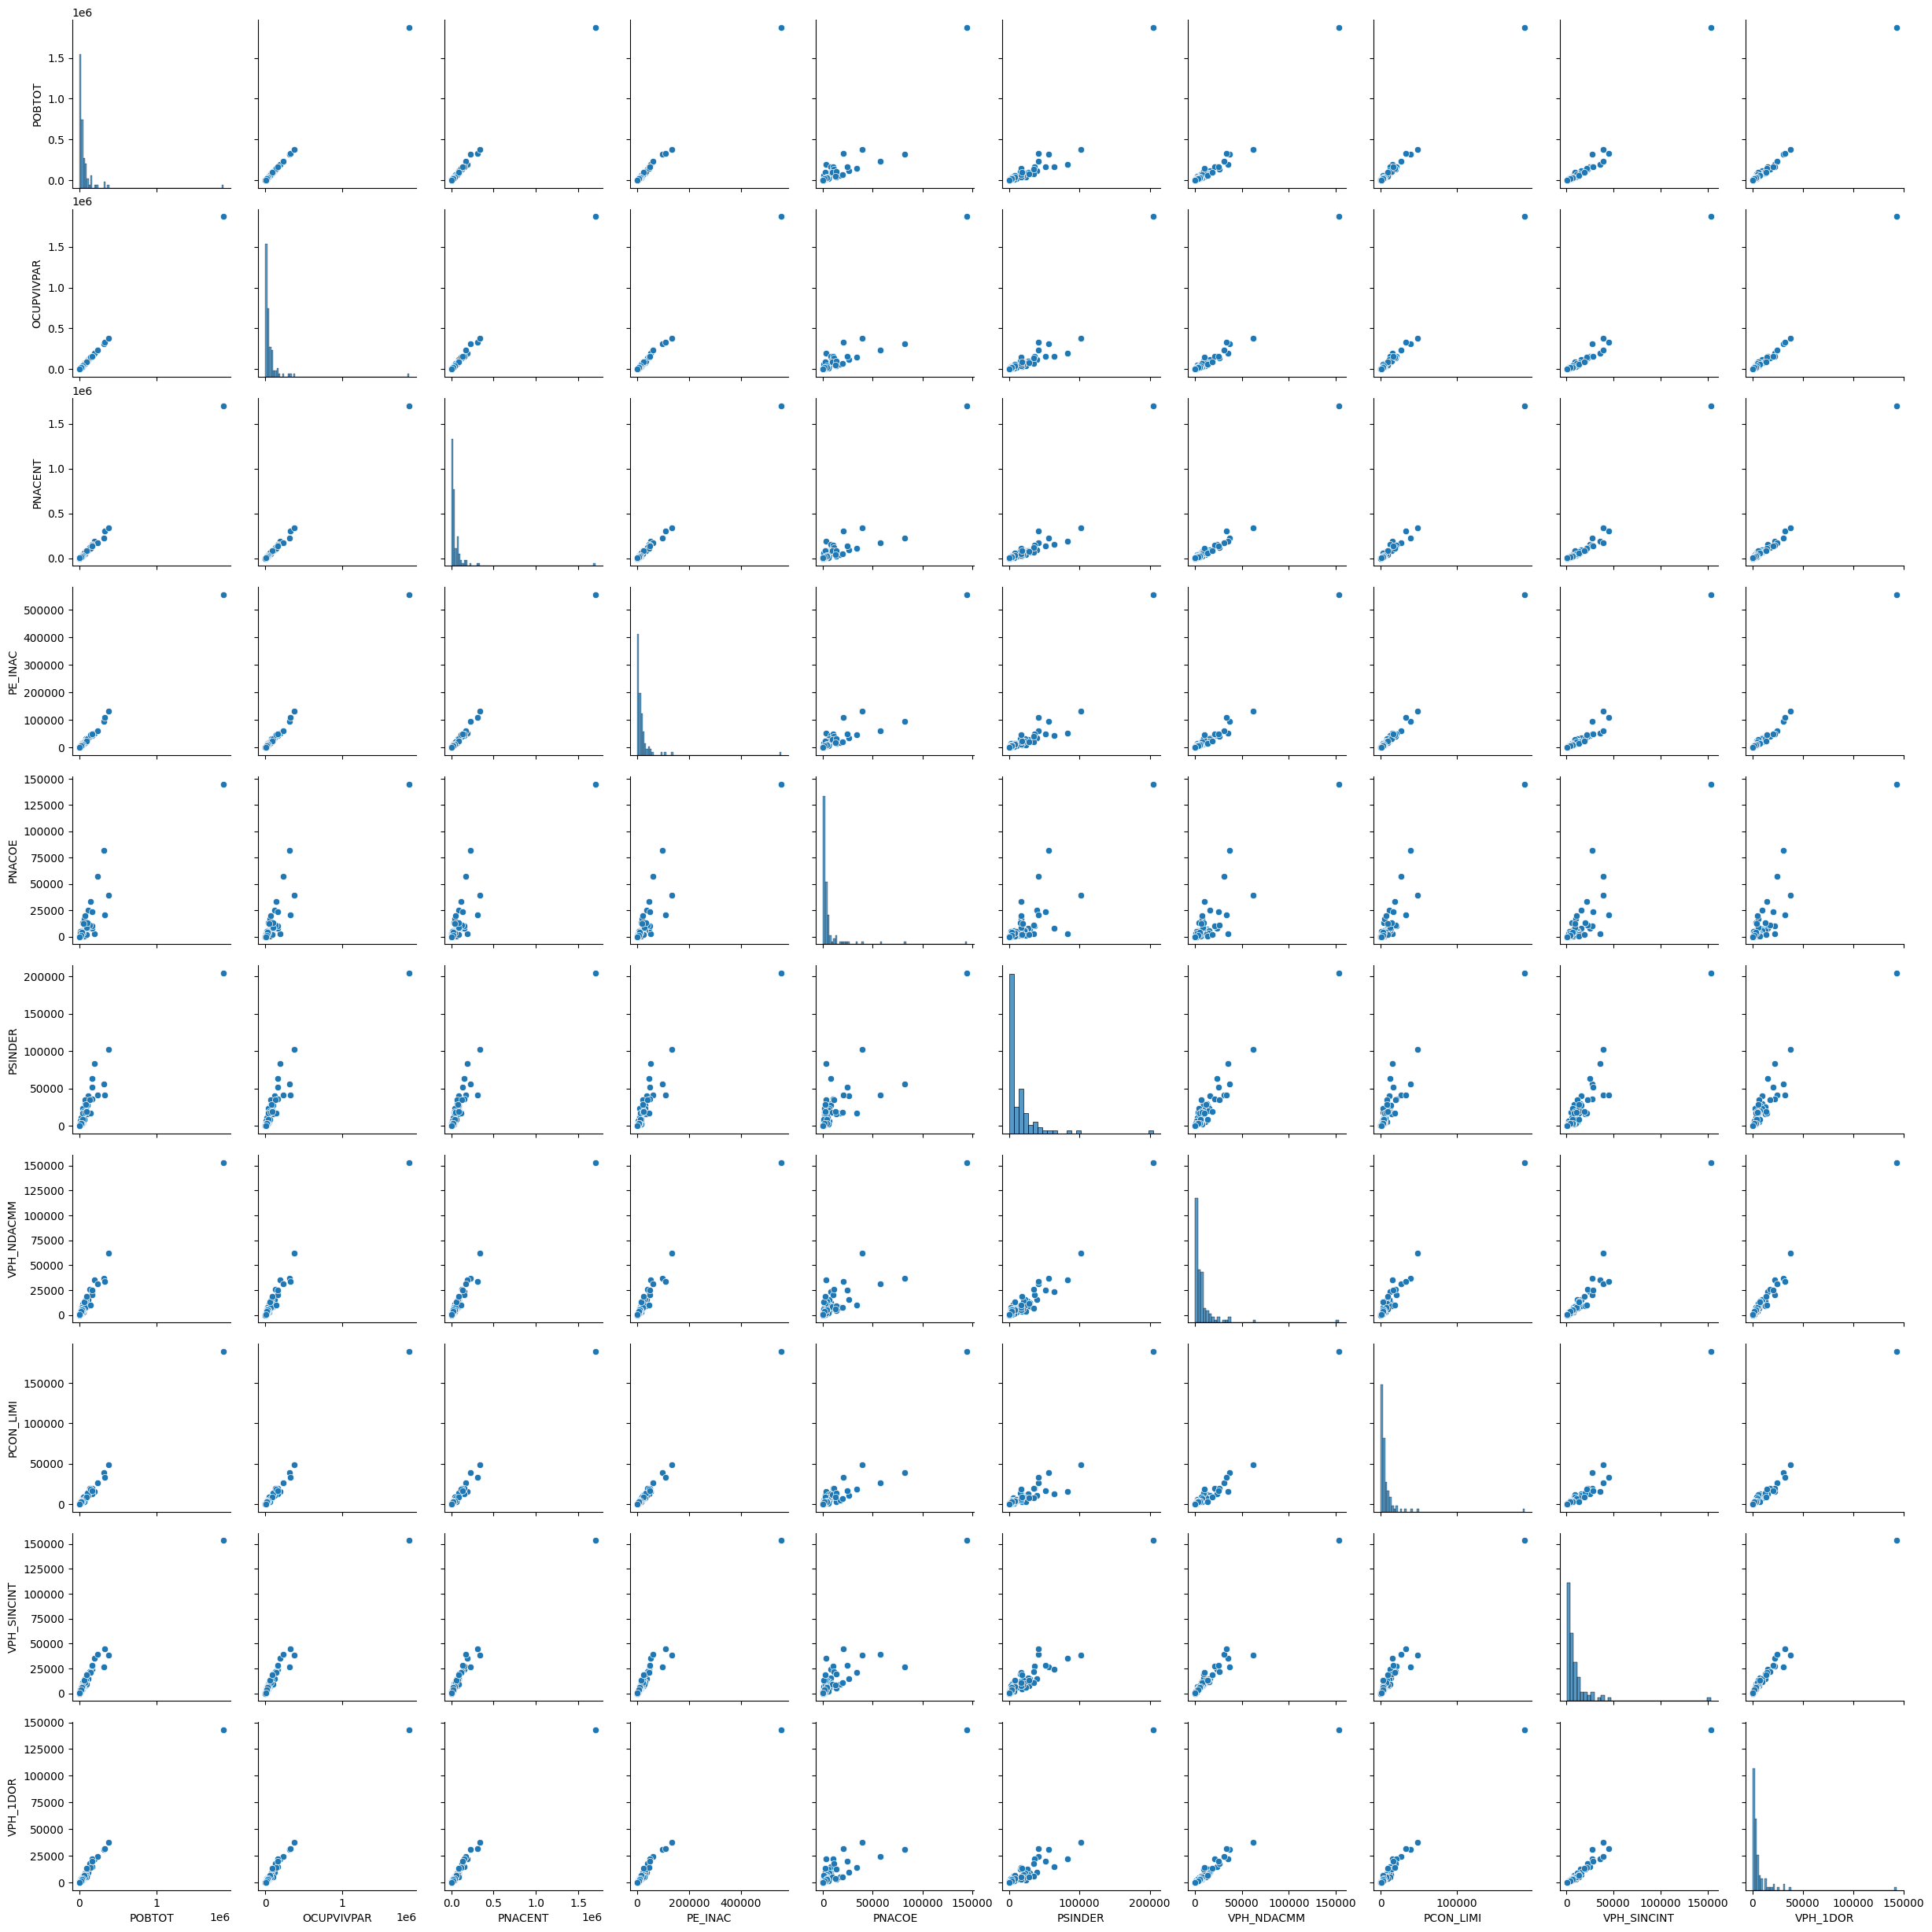

In [30]:
# Calcula la varianza de cada columna numérica, toma el top 10 y grafica muestreando 100 filas
variances = df.var().sort_values(ascending=False)
top10_vars = variances.index[:10].tolist()
print("Top 10 variables con mayor varianza:", top10_vars)
sns.pairplot(df[top10_vars].sample(100, random_state=1))
plt.show()

## Estandarizar

In [31]:
cols = df.columns.tolist()
cols =[i for i in cols if i not in ['NOM_MUN']]
cols

['POBTOT',
 'PNACENT',
 'PNACOE',
 'PRESOE15',
 'P3HLINHE',
 'PCON_DISC',
 'PCON_LIMI',
 'PCLIM_PMEN',
 'P3A5_NOA',
 'P6A11_NOA',
 'P12A14NOA',
 'P8A14AN',
 'P15YM_AN',
 'P15YM_SE',
 'P15PRI_IN',
 'P15SEC_IN',
 'GRAPROES',
 'PE_INAC',
 'PDESOCUP',
 'PSINDER',
 'OCUPVIVPAR',
 'VPH_PISOTI',
 'VPH_1DOR',
 'VPH_1CUART',
 'VPH_S_ELEC',
 'VPH_AGUAFV',
 'VPH_LETR',
 'VPH_NODREN',
 'VPH_NDEAED',
 'VPH_NDACMM',
 'VPH_SNBIEN',
 'VPH_BICI',
 'VPH_SINRTV',
 'VPH_SINLTC',
 'VPH_SINCINT',
 'VPH_SINTIC']

In [32]:
ss = StandardScaler()

In [33]:
df[['ss_' + i for i in cols]] = ss.fit_transform(df[cols])
df.head(7)

POBTOT    PNACENT    PNACOE  PRESOE15  \
NOM_ENT        NOM_MUN                                                       
Aguascalientes Aguascalientes       1900527  1447920.0  429816.0   84962.0   
               Asientos              103432    90234.0   12050.0    1872.0   
               Calvillo              116736   100662.0   13132.0    2234.0   
               Cosío                  34187    30990.0    2770.0     594.0   
               El Llano               42559    38458.0    2816.0     616.0   
               Jesús María           260317   208712.0   47796.0   11220.0   
               Pabellón de Arteaga    95866    85614.0    8832.0    1578.0   

                                    P3HLINHE  PCON_DISC  PCON_LIMI  \
NOM_ENT        NOM_MUN                                               
Aguascalientes Aguascalientes           16.0    95050.0   233410.0   
               Asientos                  0.0     5772.0     9102.0   
               Calvillo                  2.0     8176.0    13520.0   
               Cosío                     0.0     1610.0     3866.0   
               El Llano                  0.0     2282.0     5220.0   
               Jesús María               2.0    10072.0    23808.0   
               Pabellón de Arteaga       0.0     5248.0    11666.0   

                                    PCLIM_PMEN  P3A5_NOA  P6A11_NOA  ...  \
NOM_ENT        NOM_MUN                                               ...   
Aguascalientes Aguascalientes          27890.0   37278.0     5754.0  ...   
               Asientos                 1384.0    3018.0      566.0  ...   
               Calvillo                 2382.0    3376.0      504.0  ...   
               Cosío                     412.0     846.0      198.0  ...   
               El Llano                  450.0    1108.0      104.0  ...   
               Jesús María              3284.0    6498.0     1054.0  ...   
               Pabellón de Arteaga      1114.0    2552.0      298.0  ...   

                                    ss_VPH_LETR  ss_VPH_NODREN  ss_VPH_NDEAED  \
NOM_ENT        NOM_MUN                                                          
Aguascalientes Aguascalientes         -0.035873       0.166922       0.206402   
               Asientos               -0.382072      -0.140511      -0.191084   
               Calvillo               -0.416303      -0.441812      -0.061901   
               Cosío                  -0.432641      -0.490862      -0.270581   
               El Llano               -0.399966      -0.358604      -0.161272   
               Jesús María            -0.315944      -0.305176      -0.061901   
               Pabellón de Arteaga    -0.401522      -0.442688      -0.161272   

                                    ss_VPH_NDACMM  ss_VPH_SNBIEN  ss_VPH_BICI  \
NOM_ENT        NOM_MUN                                                          
Aguascalientes Aguascalientes            4.371364       0.273134     5.767537   
               Asientos                 -0.110531      -0.252327     0.287383   
               Calvillo                 -0.037110      -0.314702    -0.050930   
               Cosío                    -0.284993      -0.397868    -0.091689   
               El Llano                 -0.267831      -0.365736     0.019361   
               Jesús María               0.136869      -0.286349     1.072476   
               Pabellón de Arteaga      -0.139492      -0.386527     0.436722   

                                    ss_VPH_SINRTV  ss_VPH_SINLTC  \
NOM_ENT        NOM_MUN                                             
Aguascalientes Aguascalientes            1.988906       2.922830   
               Asientos                 -0.268812       0.078707   
               Calvillo                 -0.217817      -0.185466   
               Cosío                    -0.452706      -0.423855   
               El Llano                 -0.429526      -0.311958   
               Jesús María              -0.189228      -0.065785   
              

In [34]:
cols_ss = df.filter(like = 'ss_').columns.tolist()
cols_ss

['ss_POBTOT',
 'ss_PNACENT',
 'ss_PNACOE',
 'ss_PRESOE15',
 'ss_P3HLINHE',
 'ss_PCON_DISC',
 'ss_PCON_LIMI',
 'ss_PCLIM_PMEN',
 'ss_P3A5_NOA',
 'ss_P6A11_NOA',
 'ss_P12A14NOA',
 'ss_P8A14AN',
 'ss_P15YM_AN',
 'ss_P15YM_SE',
 'ss_P15PRI_IN',
 'ss_P15SEC_IN',
 'ss_GRAPROES',
 'ss_PE_INAC',
 'ss_PDESOCUP',
 'ss_PSINDER',
 'ss_OCUPVIVPAR',
 'ss_VPH_PISOTI',
 'ss_VPH_1DOR',
 'ss_VPH_1CUART',
 'ss_VPH_S_ELEC',
 'ss_VPH_AGUAFV',
 'ss_VPH_LETR',
 'ss_VPH_NODREN',
 'ss_VPH_NDEAED',
 'ss_VPH_NDACMM',
 'ss_VPH_SNBIEN',
 'ss_VPH_BICI',
 'ss_VPH_SINRTV',
 'ss_VPH_SINLTC',
 'ss_VPH_SINCINT',
 'ss_VPH_SINTIC']

In [35]:
df = df.reset_index()

In [37]:
df.head()

,NOM_ENT,NOM_MUN,POBTOT,PNACENT,PNACOE,PRESOE15,P3HLINHE,PCON_DISC,PCON_LIMI,PCLIM_PMEN,...,ss_VPH_LETR,ss_VPH_NODREN,ss_VPH_NDEAED,ss_VPH_NDACMM,ss_VPH_SNBIEN,ss_VPH_BICI,ss_VPH_SINRTV,ss_VPH_SINLTC,ss_VPH_SINCINT,ss_VPH_SINTIC
0,Aguascalientes,Aguascalientes,1900527,1447920.0,429816.0,84962.0,16.0,95050.0,233410.0,27890.0,...,-0.035873,0.166922,0.206402,4.371364,0.273134,5.767537,1.988906,2.922830,5.485046,0.597231
1,Aguascalientes,Asientos,103432,90234.0,12050.0,1872.0,0.0,5772.0,9102.0,1384.0,...,-0.382072,-0.140511,-0.191084,-0.110531,-0.252327,0.287383,-0.268812,0.078707,0.087155,-0.261378
2,Aguascalientes,Calvillo,116736,100662.0,13132.0,2234.0,2.0,8176.0,13520.0,2382.0,...,-0.416303,-0.441812,-0.061901,-0.037110,-0.314702,-0.050930,-0.217817,-0.185466,0.156017,-0.321822
3,Aguascalientes,Cosío,34187,30990.0,2770.0,594.0,0.0,1610.0,3866.0,412.0,...,-0.432641,-0.490862,-0.270581,-0.284993,-0.397868,-0.091689,-0.452706,-0.423855,-0.339226,-0.458207
4,Aguascalientes,El Llano,42559,38458.0,2816.0,616.0,0.0,2282.0,5220.0,450.0,...,-0.399966,-0.358604,-0.161272,-0.267831,-0.365736,0.019361,-0.429526,-0.311958,-0.209234,-0.391564


## PCA

In [38]:
PCA_2 = PCA(n_components=2)
PCA_3 = PCA(n_components=3)

In [39]:
array_pca2 = PCA_2.fit_transform(df[cols_ss])
array_pca3 = PCA_3.fit_transform(df[cols_ss])

In [40]:
PCA_2.explained_variance_ratio_

array([0.68535399, 0.15120911])

In [41]:
PCA_3.explained_variance_ratio_

array([0.68535399, 0.15120911, 0.03714748])

In [42]:
df_pca2 = pd.DataFrame({'PCA1' : array_pca2[:,0],
                        'PCA2' : array_pca2[:,1],
                        'Municipio' : df['NOM_MUN'],
                        'Entidad' : df['NOM_ENT']})


In [43]:
df_pca2_c = pd.DataFrame({'PCA1' : array_pca2[:,0],
                        'PCA2' : array_pca2[:,1],
                        'Municipio' : df['NOM_MUN'],
                        'Entidad' : df['NOM_ENT']})


In [44]:
PCA = pd.DataFrame(PCA_2.components_)
PCA_T = PCA.T
PCA_T

,0,1
0,0.193481,-0.107055
1,0.189944,-0.090553
2,0.164547,-0.132338
3,0.158463,-0.113320
4,0.035333,0.279219
5,0.190915,-0.108577
6,0.190639,-0.118054
7,0.190339,-0.117251
8,0.188132,-0.074442
9,0.191893,-0.063909


In [45]:
cols_ss_df = pd.DataFrame(cols_ss)

In [46]:
PCA_F = pd.concat([PCA_T, cols_ss_df], axis=1)
PCA_F

,0,1,0
0,0.193481,-0.107055,ss_POBTOT
1,0.189944,-0.090553,ss_PNACENT
2,0.164547,-0.132338,ss_PNACOE
3,0.158463,-0.113320,ss_PRESOE15
4,0.035333,0.279219,ss_P3HLINHE
5,0.190915,-0.108577,ss_PCON_DISC
6,0.190639,-0.118054,ss_PCON_LIMI
7,0.190339,-0.117251,ss_PCLIM_PMEN
8,0.188132,-0.074442,ss_P3A5_NOA
9,0.191893,-0.063909,ss_P6A11_NOA


In [48]:
df_pca2.head()

,PCA1,PCA2,Municipio,Entidad
0,25.351801,-6.757311,Aguascalientes,Aguascalientes
1,-0.153303,-0.410492,Asientos,Aguascalientes
2,0.170637,-0.543167,Calvillo,Aguascalientes
3,-1.724193,-0.812696,Cosío,Aguascalientes
4,-1.341279,-0.403511,El Llano,Aguascalientes


In [49]:
df_pca2['Indice'] = df_pca2['PCA1']
df_pca2.head(7)

,PCA1,PCA2,Municipio,Entidad,Indice
0,25.351801,-6.757311,Aguascalientes,Aguascalientes,25.351801
1,-0.153303,-0.410492,Asientos,Aguascalientes,-0.153303
2,0.170637,-0.543167,Calvillo,Aguascalientes,0.170637
3,-1.724193,-0.812696,Cosío,Aguascalientes,-1.724193
4,-1.341279,-0.403511,El Llano,Aguascalientes,-1.341279
5,2.098661,-0.806233,Jesús María,Aguascalientes,2.098661
6,-0.619117,-0.719969,Pabellón de Arteaga,Aguascalientes,-0.619117


## INDICE

In [50]:
Indice_min = df_pca2['Indice'].min()
Indice_max = df_pca2['Indice'].max()
df_pca2['Indice_R_21'] = (df_pca2['Indice']-Indice_min)/(Indice_max - Indice_min)*100

In [51]:
def color(c):
    
    if c <= 25: r = 'green'
    elif c <= 50: r = 'gold'
    elif c <= 75: r = 'darkorange'
    elif c > 75: r = 'red'
    else: r = 'error'

    return r

In [52]:
df_pca2['color'] = df_pca2['Indice_R_21'].map( lambda c: color(c))
df_pca2

,PCA1,PCA2,Municipio,Entidad,Indice,Indice_R_21,color
0,25.351801,-6.757311,Aguascalientes,Aguascalientes,25.351801,41.212866,gold
1,-0.153303,-0.410492,Asientos,Aguascalientes,-0.153303,3.302756,green
2,0.170637,-0.543167,Calvillo,Aguascalientes,0.170637,3.784252,green
3,-1.724193,-0.812696,Cosío,Aguascalientes,-1.724193,0.967827,green
4,-1.341279,-0.403511,El Llano,Aguascalientes,-1.341279,1.536980,green
...,...,...,...,...,...,...,...
2462,-1.739281,-0.762656,Villa González Ortega,Zacatecas,-1.739281,0.945401,green
2463,-1.410482,-0.560650,Villa Hidalgo,Zacatecas,-1.410482,1.434118,green
2464,-0.552847,-0.190360,Villa de Cos,Zacatecas,-0.552847,2.708885,green
2465,-0.939912,-0.510048,Villanueva,Zacatecas,-0.939912,2.133562,green


Text(0.5, 1.0, 'Índice de riesgo del municipio')

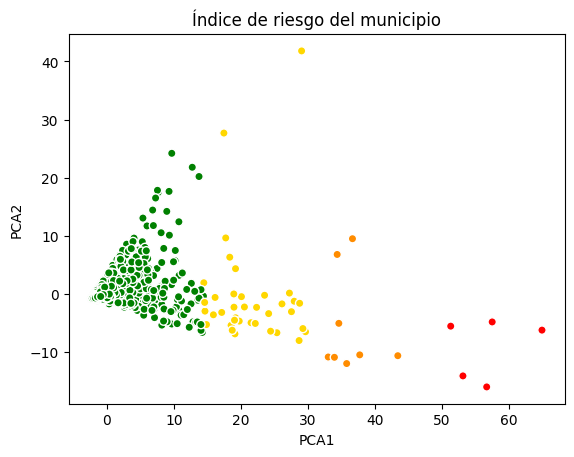

In [53]:
plt.scatter(df_pca2['PCA1'], df_pca2['PCA2'], c=df_pca2['color'], edgecolors = 'white')
#for i in range(len(df_pca2)):
    #plt.text(df_pca2['PCA1'][i], df_pca2['PCA2'][i], str(df_pca2['Municipio'][i]), fontsize=6, ha="right", va="bottom")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title("Índice de riesgo del municipio")

In [54]:
#df_pca2.to_csv('df_pca.csv', index=True)